## **1 Uso de K-Means como Técnica de Agrupamiento**
---

### **1.1 Fundamentes de la Técnica**

El algoritmo **K-Means** es una técnica de **aprendizaje no supervisado** que se utiliza para **agrupar datos** **(clustering)** en función de su similitud.

El objetivo es dividir un conjunto de datos en $k$ grupos (o clústeres) de tal forma que los puntos dentro de un mismo grupo sean lo más parecidos posible entre sí y lo más diferentes posible de los de otros grupos.

*   Es útil cuando no se conocen las etiquetas.
*   Se basa en la minimización de la distancia a los centroides.
*   Requiere especificar el número de clústeres $k$ antes de iniciar.

---

### **1.2 Modelo Matemático**

El algoritmo K-Means busca minimizar la **Inercia** (también conocida como Within-Cluster Sum of Squares o WCSS). La inercia mide qué tan dispersos están los puntos dentro de un cluster; cuanto menor sea, mejor es la compactación del cluster.

**Función Objetivo (Inercia):**

$$\underset{S}{\operatorname{argmin}} \sum_{i=1}^{k} \sum_{x \in S_i} \|x - \mu_i\|^2$$

Donde:

$S$: La partición del dataset en $k$ clusters ($S_1, S_2, \ldots, S_k$).

$x$: Un punto de dato.

$\mu_i$: El centroide (media) del cluster $S_i$.

$\|x - \mu_i\|^2$: El cuadrado de la Distancia Euclidiana entre el punto $x$ y el centroide $\mu_i$.

### **1.3 Librería scikit-learn**

Utilizaremos la librería scikit-learn para la implementación de kNN.


| Componente | Descripción |
| :--- | :--- |
| `from sklearn.cluster import KMeans` | Importa el modelo K-Means. |
| `KMeans(n_clusters=8, init='k-means++', n_init=10)` | Constructor de la clase. |
| `KMeans(n_clusters=k)` | Crea el modelo con $k$ clústeres. |
| `fit(X, y)` | Ejecuta el algoritmo sobre los datos. |
| `predict(X)` | Asigna un clúster a cada punto nuevo. |
| `.cluster_centers_` | Devuelve las coordenadas de los centroides. |
| `.inertia_` | Devuelve el valor de la función de costo $J$ (suma de errores cuadrados). |

<br>

---

### **1.4 Pipeline**

**Preprocesamiento**

En esta etapa se realiza un **análisis estadístico inicial** del conjunto de datos y una **visualización** de cómo se distribuyen los puntos en el espacio.

El dataset empleado se genera con la función `make_blobs`, la cual crea grupos de datos (clústeres) de forma controlada.  
Esto permite observar fácilmente cómo el algoritmo **K-Means** agrupa los puntos según su cercanía a los centroides.

Se mostrarán:
- Estadísticas básicas (media, desviación estándar, valores máximos y mínimos).  
- Un **gráfico de dispersión (Scatter Plot)** para visualizar los grupos reales antes de aplicar el modelo.

Resumen estadístico del dataset:
        Feature 1   Feature 2  True Label
count  300.000000  300.000000  300.000000
mean    -1.587895    1.360443    1.000000
std      4.844461    6.588626    0.817861
min     -8.609778   -8.491454    0.000000
25%     -6.433629   -6.482026    0.000000
50%     -2.533886    1.981159    1.000000
75%      4.148532    8.511356    2.000000
max      6.260140   10.918405    2.000000


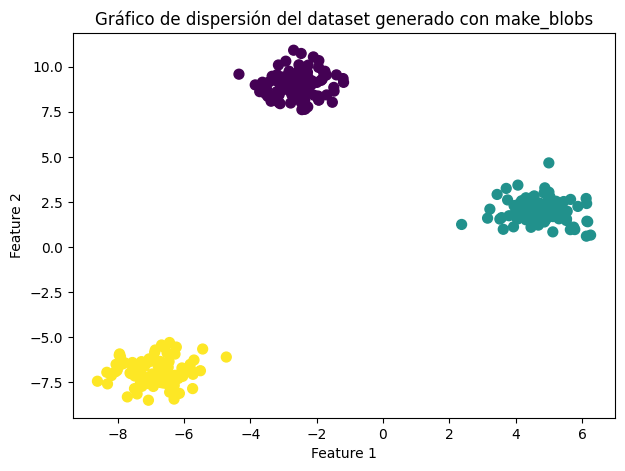

In [5]:
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt

# Generar datos sintéticos con 3 clústeres
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.7, random_state=42)

# Convertir a DataFrame
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df["True Label"] = y_true

# Análisis estadístico
print("Resumen estadístico del dataset:")
print(df.describe())

# Gráfico de dispersión
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=50)
plt.title("Gráfico de dispersión del dataset generado con make_blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

**Application**

El modelo **K-Means** se utiliza para **agrupar los datos sin necesidad de etiquetas**.  
El algoritmo parte de $k$ centroides iniciales (en este caso, 3) y ajusta iterativamente sus posiciones hasta que los grupos se estabilizan.

Cada punto del dataset se asigna al clúster más cercano según la distancia euclidiana.

Centroides calculados por el modelo:
[[-2.59602216  9.03478469]
 [-6.88259841 -6.95282178]
 [ 4.71493601  1.9993669 ]]


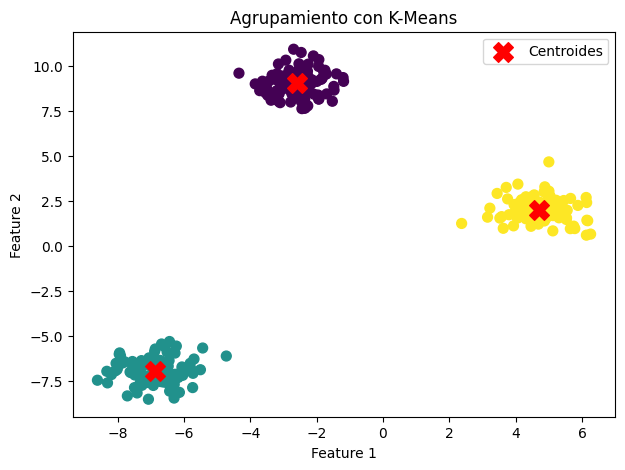

In [6]:
from sklearn.cluster import KMeans

# Crear modelo K-Means con 3 clústeres
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Asignar etiquetas al dataframe
df["Cluster"] = kmeans.labels_

# Mostrar centroides
print("Centroides calculados por el modelo:")
print(kmeans.cluster_centers_)

# Visualización de los clústeres
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroides')
plt.title("Agrupamiento con K-Means")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


**Prediction**

Se define una **función de Python** que recibe como entrada un patrón (es decir, un punto con dos características)  
y devuelve el **número de clúster** al que el modelo K-Means lo asigna.

Esto simula el proceso de **clasificar un nuevo dato** sin conocer a qué grupo pertenece.

In [7]:
def predecir_cluster(feature1, feature2):
    nuevo_punto = [[feature1, feature2]]
    cluster_pred = kmeans.predict(nuevo_punto)[0]
    print(f"El punto ({feature1}, {feature2}) pertenece al clúster: {cluster_pred}")

# Ejemplos de predicción
predecir_cluster(1, 4)
predecir_cluster(-5, 7)
predecir_cluster(3, 0)

El punto (1, 4) pertenece al clúster: 2
El punto (-5, 7) pertenece al clúster: 0
El punto (3, 0) pertenece al clúster: 2


**Model Evaluation**

Aunque el algoritmo K-Means es **no supervisado**, podemos evaluar qué tan bien los clústeres formados coinciden con las clases reales del dataset generado.

Se emplean dos métricas:

- **Matriz de Confusión:** muestra la relación entre los clústeres predichos y las etiquetas verdaderas.  
- **Accuracy (precisión):** porcentaje de coincidencias entre los grupos encontrados y las etiquetas originales.

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.stats import mode
import numpy as np

# Ajuste de etiquetas
labels = np.zeros_like(kmeans.labels_)
for i in range(3):
    mask = (kmeans.labels_ == i)
    labels[mask] = mode(y_true[mask], keepdims=True)[0]

# Cálculo de métricas
cm = confusion_matrix(y_true, labels)
acc = accuracy_score(y_true, labels)

print("Matriz de Confusión:")
print(cm)
print(f"Precisión aproximada del modelo: {acc:.2f}")


Matriz de Confusión:
[[100   0   0]
 [  0 100   0]
 [  0   0 100]]
Precisión aproximada del modelo: 1.00


---
### **1.5 Fuentes Bibliográficas**

Kavlakoglu, E., & Winland, V. (s.f.). **¿Qué es la agrupación en clústeres k-means?** | IBM. IBM. https://www.ibm.com/mx-es/think/topics/k-means-clustering

**KMeans.** (s.f.). scikit-learn. https://scikit--learn-org.translate.goog/stable/modules/generated/sklearn.cluster.KMeans.html?_x_tr_sl=en&amp;_x_tr_tl=es&amp;_x_tr_hl=es&amp;_x_tr_pto=tc

---
Hecho por **Luis Angel De La Cruz Ascencio**



